In [1]:
import qiskit
import numpy as np
import qtm.base, qtm.constant, qtm.ansatz, qtm.fubini_study
import importlib
importlib.reload(qtm.fubini_study)
importlib.reload(qtm.ansatz)
importlib.reload(qtm.base)
importlib.reload(qtm.constant)

<module 'qtm.constant' from 'c:\\Users\\HAI\\Desktop\\vutuanhai\\QuantumTomography\\codes\\qtm\\constant.py'>

### GHZ

In [ ]:
qubits = range(2, 11)
variances = []
for num_qubits in qubits:
    print(num_qubits)
    # Init parameters
    num_layers = 2
    # thetas = np.random.uniform(low = 0, high = 1, size = num_layers*(2*num_qubits - 2)) 
    theta = np.pi / 2
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    grads = []
    for i in range(0, 200):
        # if i % 10 == 0:
        #     print(i)
        thetas = np.random.uniform(low= 0, high= 2 * np.pi, size=num_layers*(2*num_qubits - 2))
        G = qtm.fubini_study.qng(qc.copy(), thetas, qtm.ansatz.create_star2graph_state, num_layers)
        grad_loss = qtm.base.grad_loss(
            qc, 
            qtm.ansatz.create_GHZchecker_star2graph,
            thetas, num_layers = num_layers, theta = theta)
        grad = np.linalg.inv(G) @ grad_loss
        grads.append(grad[-1])
    print(np.var(grads))
    variances.append(np.var(grads))

In [3]:
qubits = range(2, 11)
variances = []
for num_qubits in qubits:
    print(num_qubits)
    # Init parameters
    num_layers = 2
    # thetas = np.random.uniform(low = 0, high = 1, size = num_layers*(2*num_qubits - 2)) 
    theta = np.pi / 2
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    grads = []
    for i in range(0, 200):
        # if i % 10 == 0:
        #     print(i)
        thetas = np.random.uniform(low= 0, high= 2 * np.pi, size=num_layers*(2*num_qubits))
        G = qtm.fubini_study.qng(qc.copy(), thetas, qtm.ansatz.create_polygongraph_state, num_layers)
        grad_loss = qtm.base.grad_loss(
            qc, 
            qtm.ansatz.create_GHZchecker_polygongraph,
            thetas, num_layers = num_layers, theta = theta)
        grad = np.linalg.inv(G) @ grad_loss
        grads.append(grad[-1])
    print(np.var(grads))
    variances.append(np.var(grads))

2
0.27009161176780305
3
0.14091101455900001
4
0.05235849729421147
5
0.008420462231000002
6
0.0033541284715159626
7
0.000956392624
8
0.000138990377838935
9
0.00012255380400000006
10
3.4565545365572165e-05


-1.2257922776814651
-1.1839136440657767
-1.5158704081380296


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


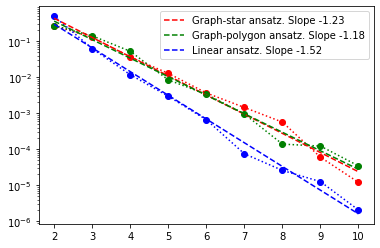

In [12]:
from matplotlib import pyplot as plt
num_qubits = range(2, 11)

# graph-star ansatz
star_variances = [
    0.27085798507381925, 
    0.1271022219,
    0.03649865937499999,
    0.012815382519000001,
    0.003652557391000001,
    0.0014441323840000003,
    0.0005664390710000003,
    6.0335879000000016e-05,
    1.2069670999999998e-05
]

polygon_variances = [
    0.27009161176780305,
    0.14091101455900001,
    0.05235849729421147,
    0.008420462231000002,
    0.0033541284715159626,
    0.000956392624,
    0.000138990377838935,
    0.00012255380400000006,
    3.4565545365572165e-05
]

linear_variances = [
    0.4914614136501438,
    0.06244020738719319,
    0.011758961072633937,
    0.0029605306725032947,
    0.0006606912633990858,
    7.501980000636176e-05,
    2.5908318086157836e-05,
    1.2642166764496657e-05,
    2.061685995309763e-06
]


star_variances = np.array(star_variances)
polygon_variances = np.array(polygon_variances)
linear_variances = np.array(linear_variances)
num_qubits = np.array(num_qubits)
p_star = np.polyfit(num_qubits, np.log(star_variances), 1)
p_polygon = np.polyfit(num_qubits, np.log(polygon_variances), 1)
p_linear = np.polyfit(num_qubits, np.log(linear_variances), 1)
print(p_star[0])
print(p_polygon[0])
print(p_linear[0])
plt.plot(num_qubits, star_variances, marker = 'o', linestyle = 'dotted', color = 'red')
plt.plot(num_qubits, polygon_variances, marker = 'o', linestyle = 'dotted', color = 'green')
plt.plot(num_qubits, linear_variances, marker = 'o', linestyle = 'dotted', color = 'blue')
plt.semilogy(num_qubits, np.exp(p_star[0] * num_qubits + p_star[1]), linestyle='dashed', color = 'red', label="Graph-star ansatz. Slope {:3.2f}".format(p_star[0]))
plt.semilogy(num_qubits, np.exp(p_polygon[0] * num_qubits + p_polygon[1]), linestyle='dashed', color = 'green', label="Graph-polygon ansatz. Slope {:3.2f}".format(p_polygon[0]))
plt.semilogy(num_qubits, np.exp(p_linear[0] * num_qubits + p_linear[1]), linestyle='dashed', color = 'blue', label="Linear ansatz. Slope {:3.2f}".format(p_linear[0]))
plt.xticks(num_qubits)
plt.legend()
plt.savefig('bp.eps', format = 'eps', dpi = 1000)